# Advanced Pairs Trading : Kalman Filters

## Import library

In [12]:
import sys
sys.path.append('../../')

In [13]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter

## Getting the Data

In [14]:
XAUUSD = load_data()

## Class Kalman Filter

## XAUUSD & USDJPY

In [15]:
Currency_Pair = 'USDJPY'

## TF D1

In [16]:
TF = 'D1'

In [17]:
data_1 = XAUUSD[TF]

In [18]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

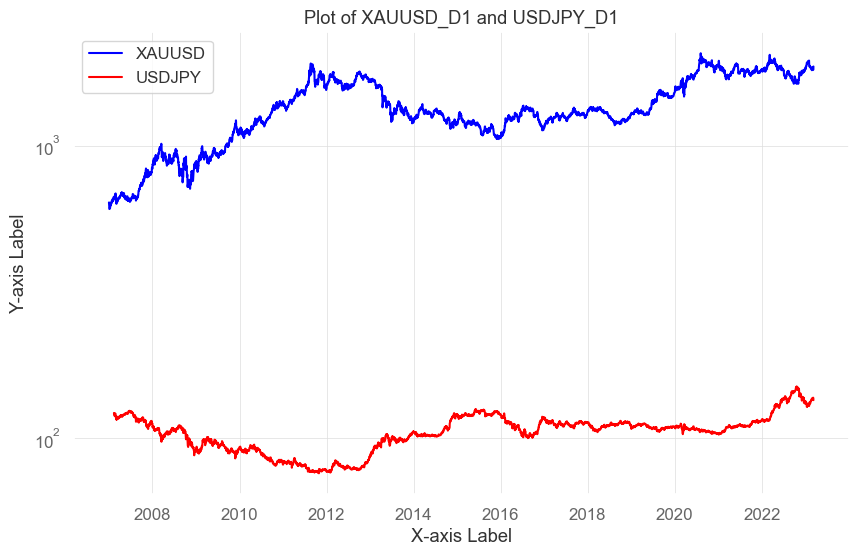

In [19]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [20]:
KF = Kalman_Filter(data_1,data_2)

In [21]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          5.972e+04
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:44:28   Log-Likelihood:                         -37037.
No. Observations:                5021   AIC:                                  7.408e+04
Df Residuals:                    5020   BIC:                                  7.408e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         12.5893      0.052    244.371      0.000      12.488      12.690
==============================================================================
Omnibus:                       64.002   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.023
Skew:                          -0.016   Prob(JB):                     3.36e-09
Kurtosis:                       2.569   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
result = KF.Run()

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-02-13
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -87.52%
CAGR﹪                     -8.55%

Sharpe                     -0.42
Prob. Sharpe Ratio         3.13%
Smart Sharpe               -0.41
Sortino                    -0.57
Smart Sortino              -0.56
Sortino/√2                 -0.4
Smart Sortino/√2           -0.4
Omega                      0.93

Max Drawdown               -90.39%
Longest DD Days            5735
Volatility (ann.)          20.2%
Calmar                     -0.09
Skew                       -0.28
Kurtosis                   5.32

Expected Daily %           -0.04%
Expected Monthly %         -1.07%
Expected Yearly %          -11.52%
Kelly Criterion            -3.81%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.13%
Expected Shortfall (cVaR)  -2.13%

Max Consecutive

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-28,2022-10-20,2023-03-10,5735,-90.393283,-89.428864
2,2007-02-14,2007-04-20,2007-05-16,92,-6.580597,-6.514567
3,2007-05-28,2007-06-06,2007-06-07,11,-2.841693,-2.580292
4,2007-06-17,2007-06-19,2007-06-19,3,-0.895801,-0.160189
5,2007-05-18,2007-05-20,2007-05-21,4,-0.748362,-0.728408


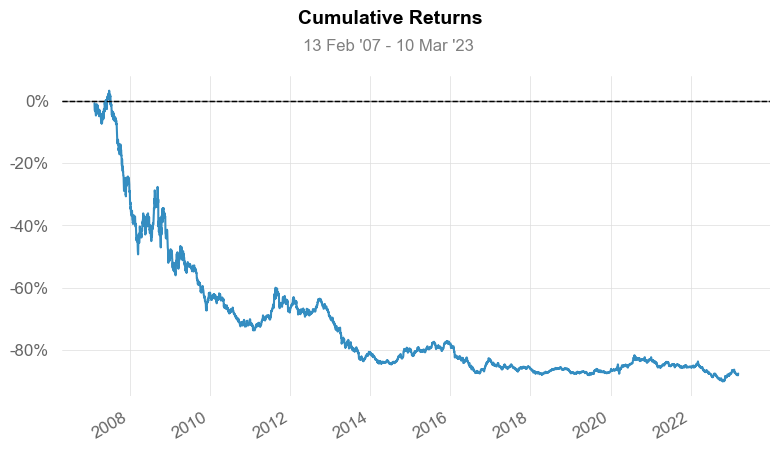

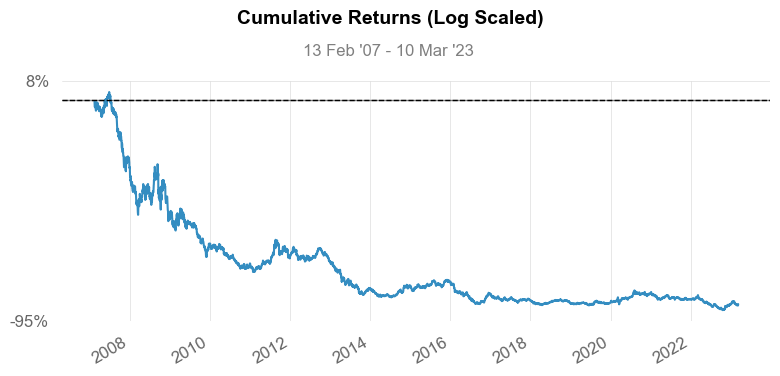

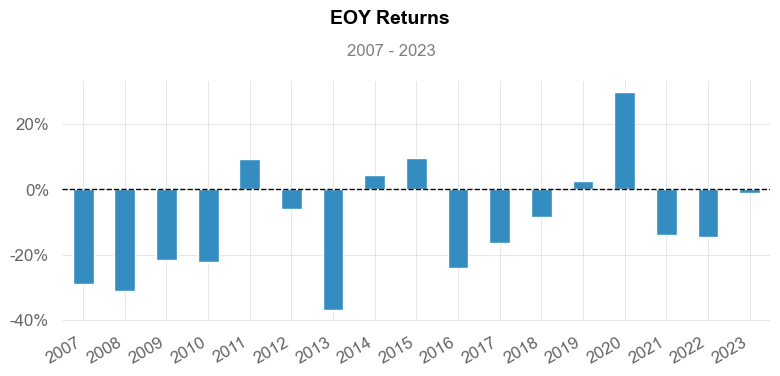

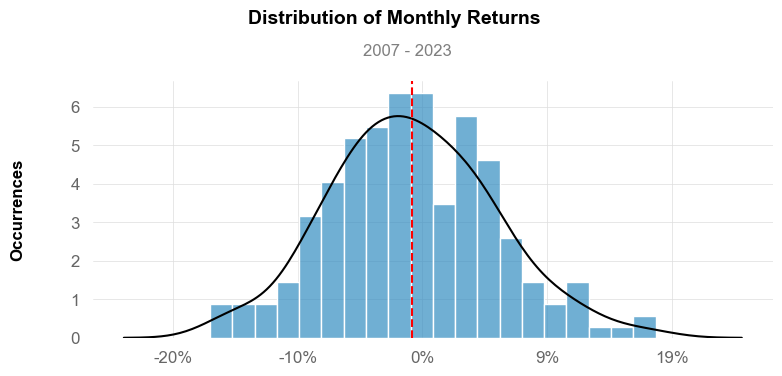

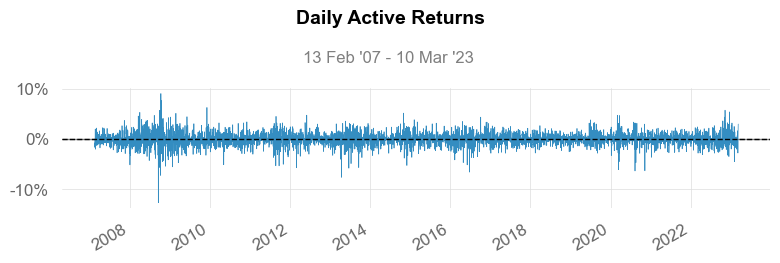

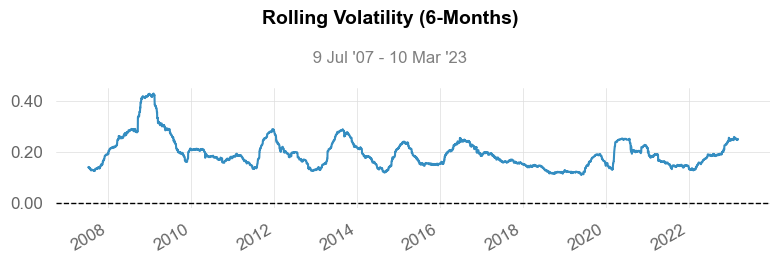

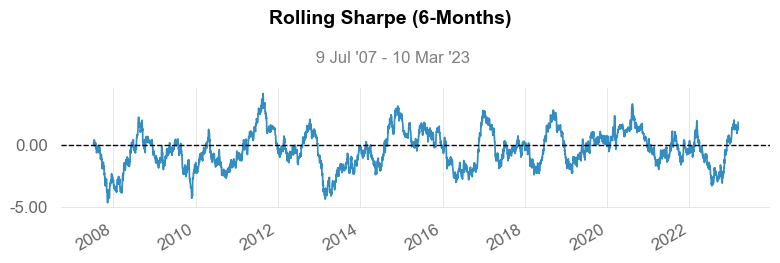

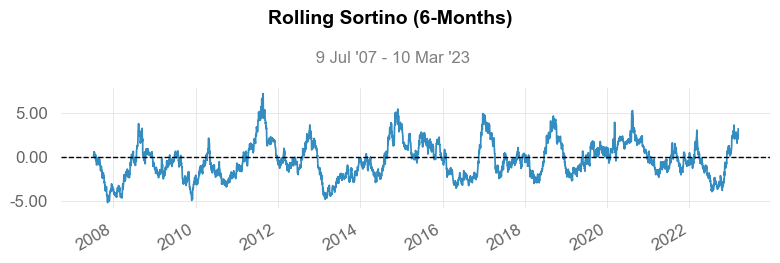

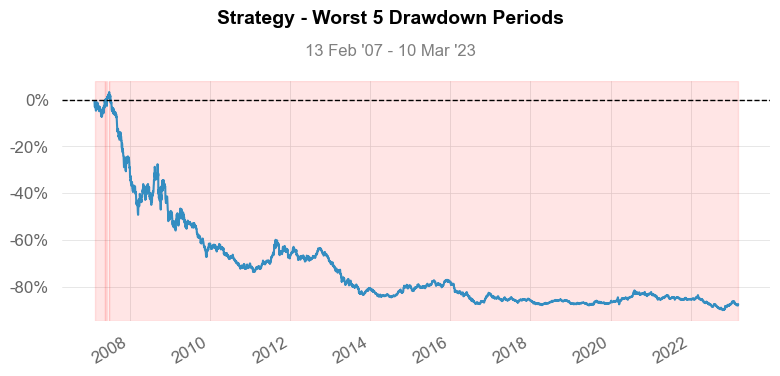

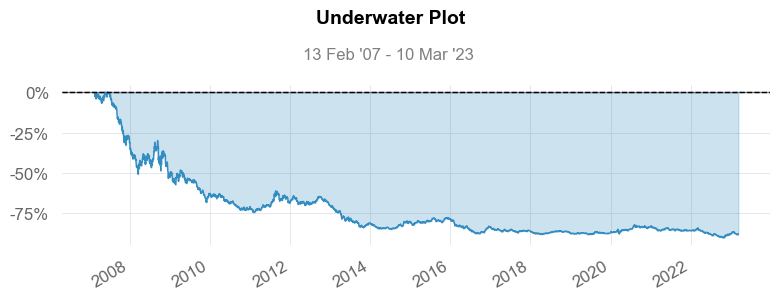

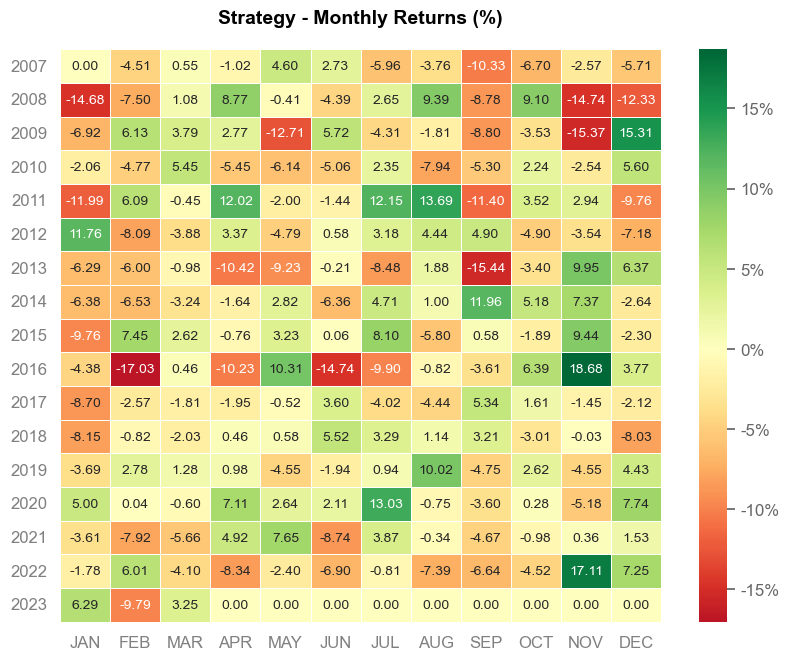

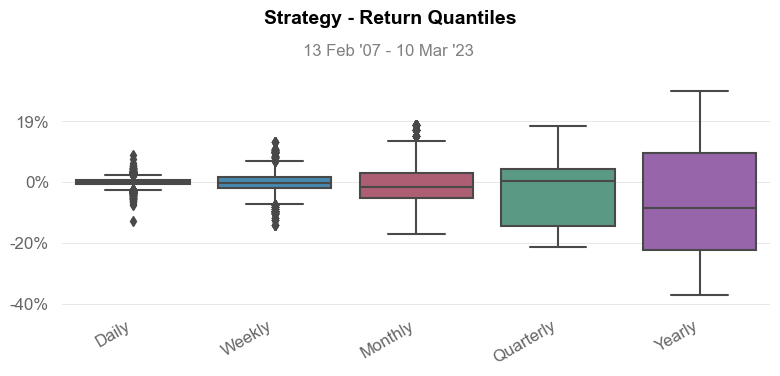

In [23]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H4

In [24]:
TF = 'H4'

In [25]:
data_1 = XAUUSD[TF]

In [26]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

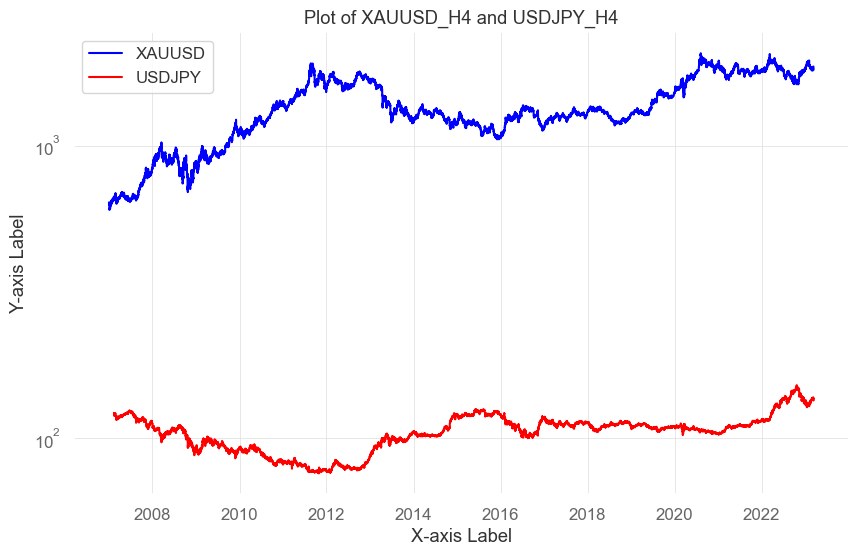

In [27]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [28]:
KF = Kalman_Filter(data_1, data_2)

In [29]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          3.077e+05
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:45:31   Log-Likelihood:                     -1.9080e+05
No. Observations:               25865   AIC:                                  3.816e+05
Df Residuals:                   25864   BIC:                                  3.816e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         12.5919      0.023    554.666      0.000      12.547      12.636
==============================================================================
Omnibus:                      332.140   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.785
Skew:                          -0.017   Prob(JB):                     2.51e-44
Kurtosis:                       2.570   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
result = KF.Run()

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-02-13
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -40.42%
CAGR﹪                     -2.2%

Sharpe                     -0.48
Prob. Sharpe Ratio         1.61%
Smart Sharpe               -0.48
Sortino                    -0.66
Smart Sortino              -0.65
Sortino/√2                 -0.46
Smart Sortino/√2           -0.46
Omega                      0.91

Max Drawdown               -53.06%
Longest DD Days            5851
Volatility (ann.)          5.15%
Calmar                     -0.04
Skew                       -0.23
Kurtosis                   15.11

Expected Daily %           -0.01%
Expected Monthly %         -0.27%
Expected Yearly %          -3.0%
Kelly Criterion            -4.89%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.54%
Expected Shortfall (cVaR)  -0.54%

Max Consecutive

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-03-04,2019-06-02,2023-03-10,5851,-53.058840,-52.254764
2,2007-02-14,2007-02-14,2007-02-15,2,-0.389232,-0.186032
3,2007-02-23,2007-02-25,2007-02-26,4,-0.197012,-0.137665
4,2007-02-28,2007-02-28,2007-02-28,1,-0.173657,NaN
5,2007-02-20,2007-02-20,2007-02-20,1,-0.098408,NaN


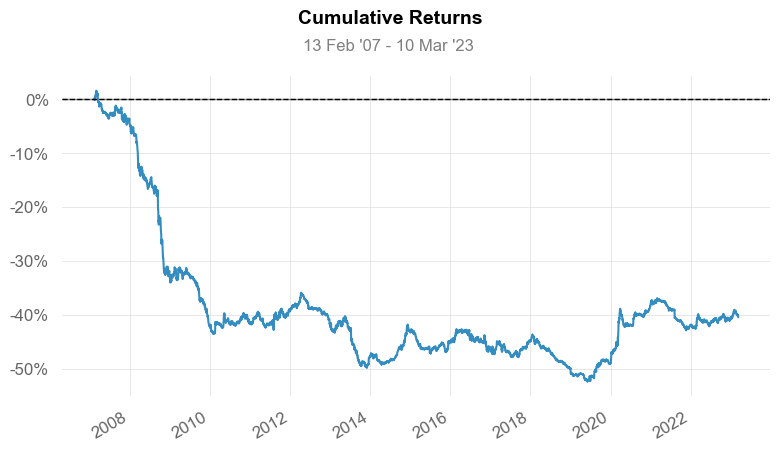

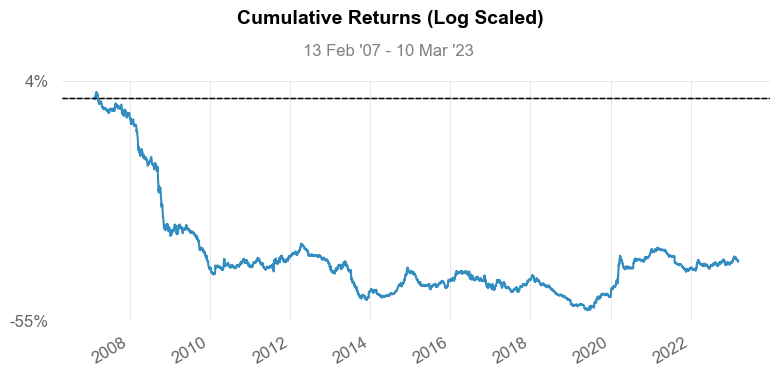

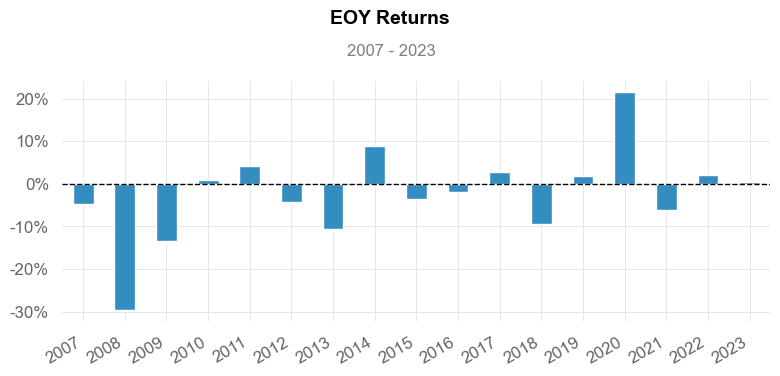

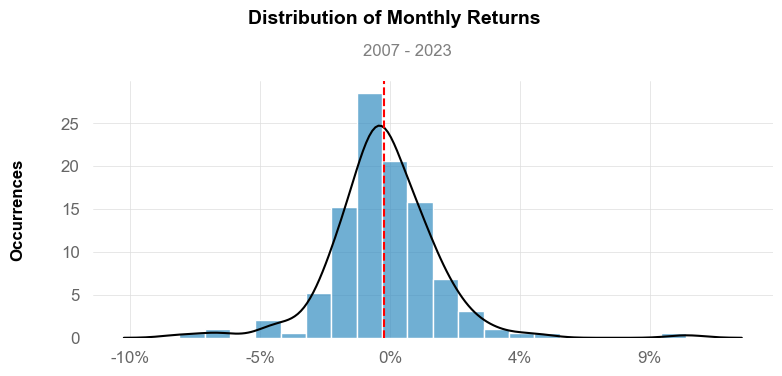

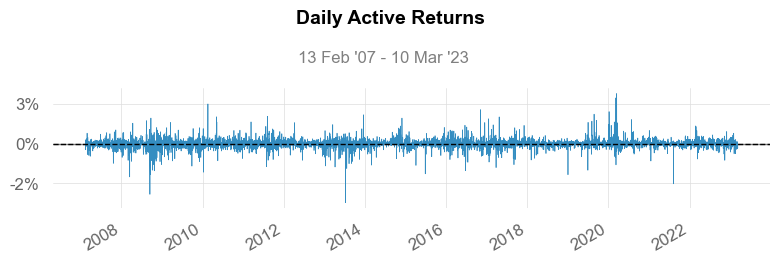

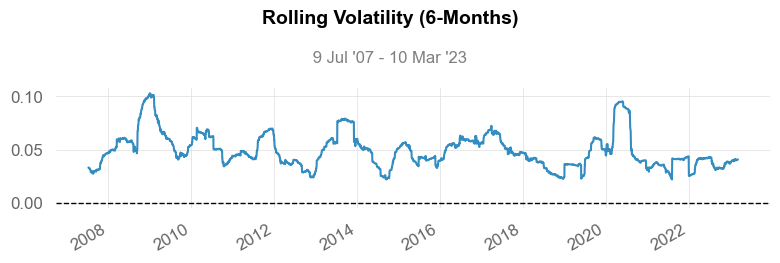

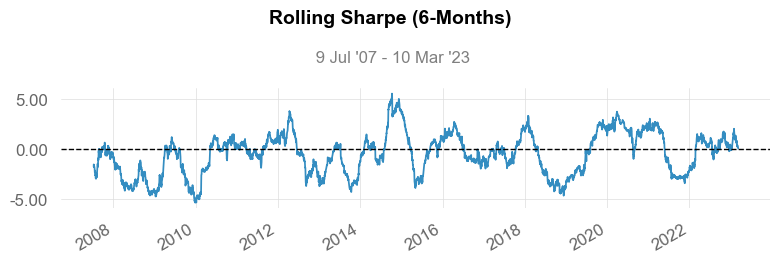

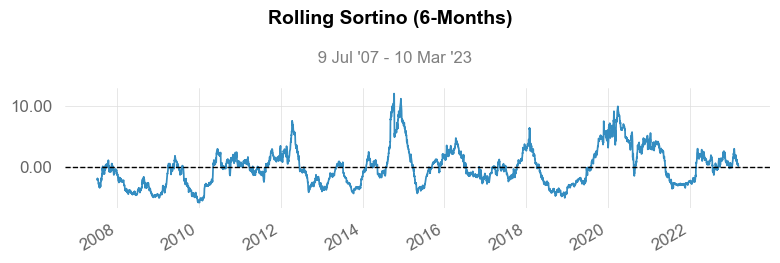

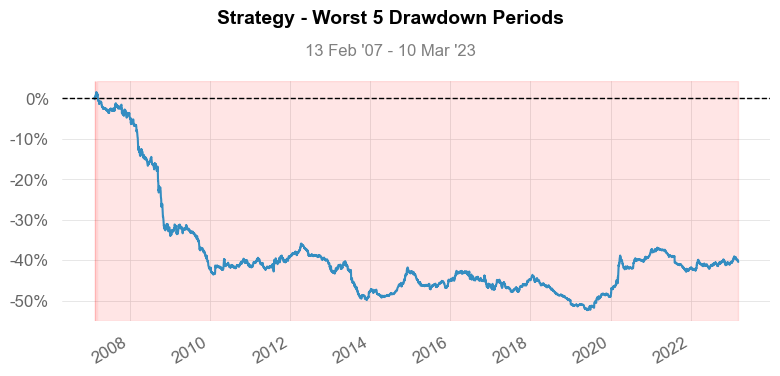

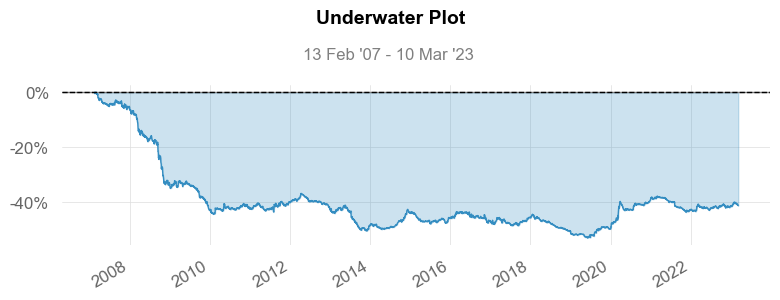

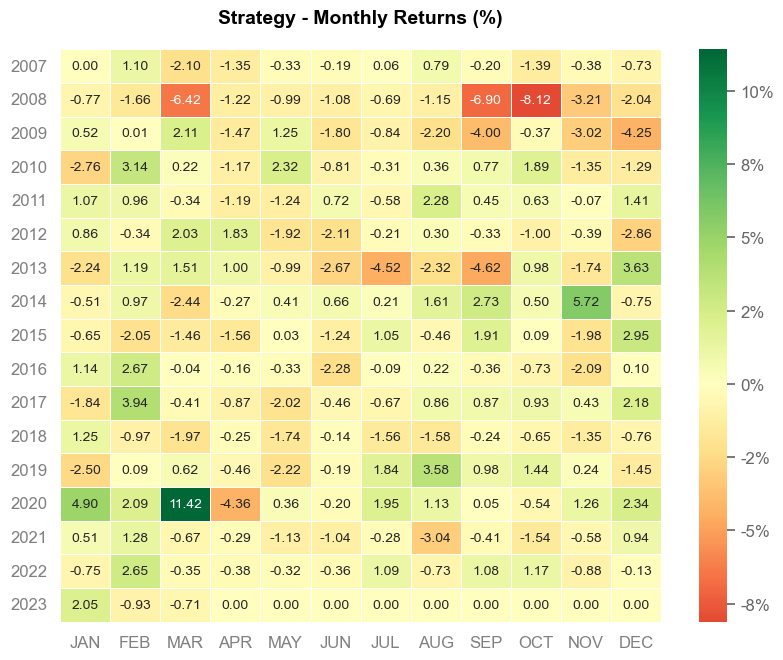

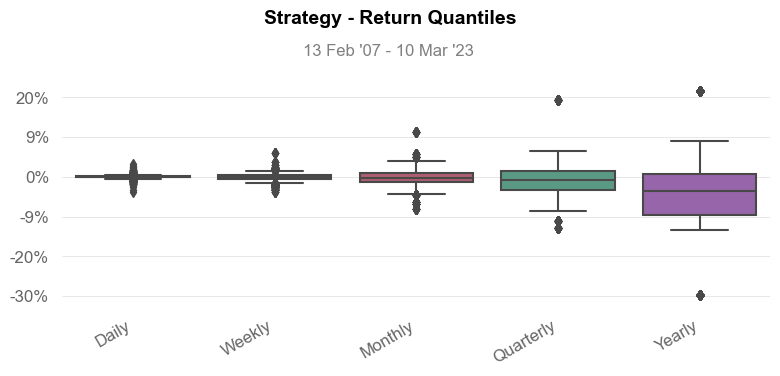

In [31]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H1

In [32]:
TF = 'H1'

In [33]:
data_1 = XAUUSD[TF]

In [34]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

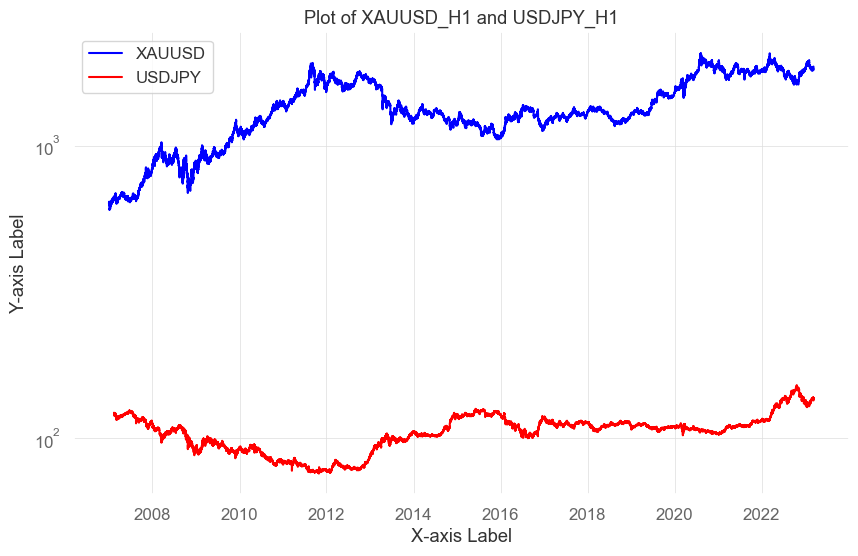

In [35]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [36]:
KF = Kalman_Filter(data_1, data_2)

In [37]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          1.190e+06
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:49:56   Log-Likelihood:                     -7.3785e+05
No. Observations:              100026   AIC:                                  1.476e+06
Df Residuals:                  100025   BIC:                                  1.476e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         12.5923      0.012   1090.876      0.000      12.570      12.615
==============================================================================
Omnibus:                     1284.197   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              775.577
Skew:                          -0.018   Prob(JB):                    3.85e-169
Kurtosis:                       2.570   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
result = KF.Run()

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-02-12
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -2.54%
CAGR﹪                     -0.11%

Sharpe                     -0.02
Prob. Sharpe Ratio         45.92%
Smart Sharpe               -0.02
Sortino                    -0.03
Smart Sortino              -0.03
Sortino/√2                 -0.02
Smart Sortino/√2           -0.02
Omega                      1.0

Max Drawdown               -37.83%
Longest DD Days            5592
Volatility (ann.)          3.28%
Calmar                     -0.0
Skew                       -0.17
Kurtosis                   13.53

Expected Daily %           -0.0%
Expected Monthly %         -0.01%
Expected Yearly %          -0.15%
Kelly Criterion            -0.22%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.34%
Expected Shortfall (cVaR)  -0.34%

Max Consecutive 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-11-18,2019-06-02,2023-03-10,5592,-37.832924,-37.521584
2,2007-02-25,2007-06-26,2007-07-25,151,-1.383217,-1.275470
3,2007-08-28,2007-09-03,2007-09-13,17,-0.632955,-0.626209
4,2007-10-17,2007-10-28,2007-11-06,21,-0.592160,-0.516588
5,2007-08-09,2007-08-10,2007-08-17,9,-0.507628,-0.495408


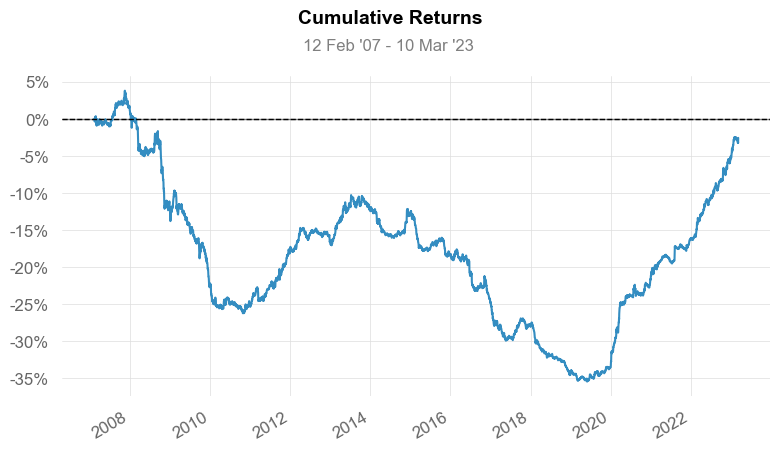

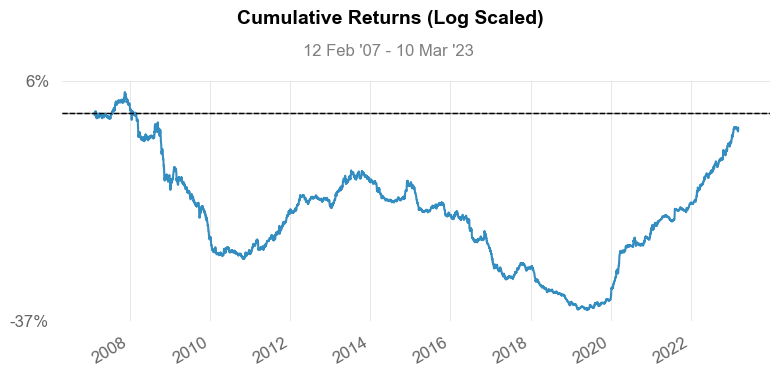

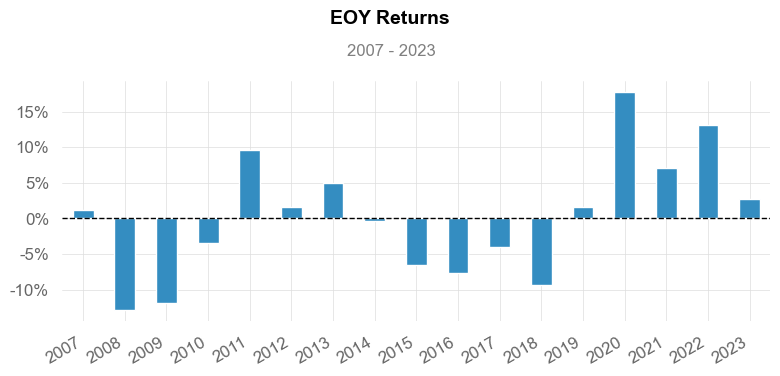

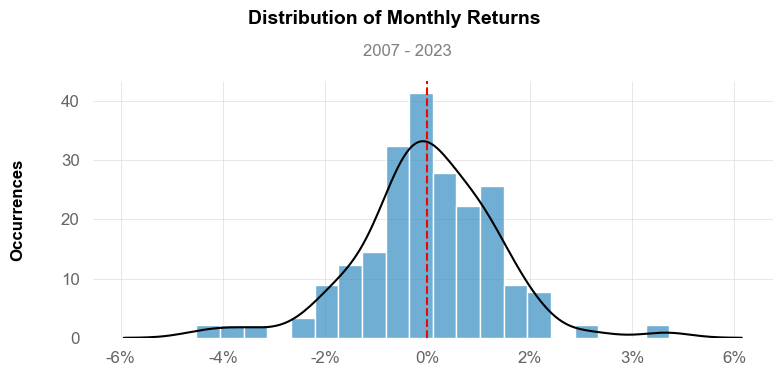

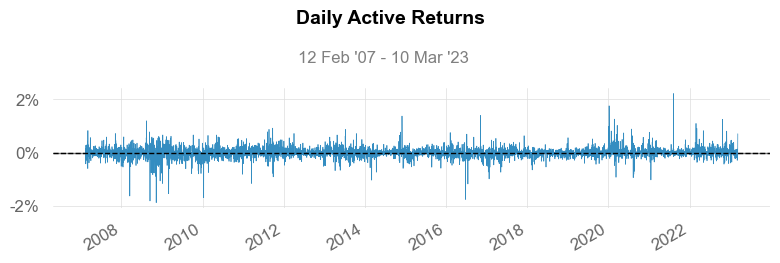

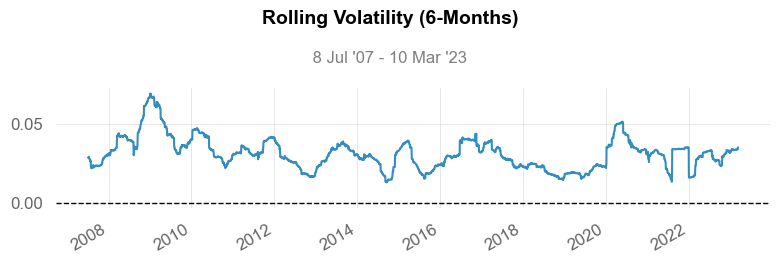

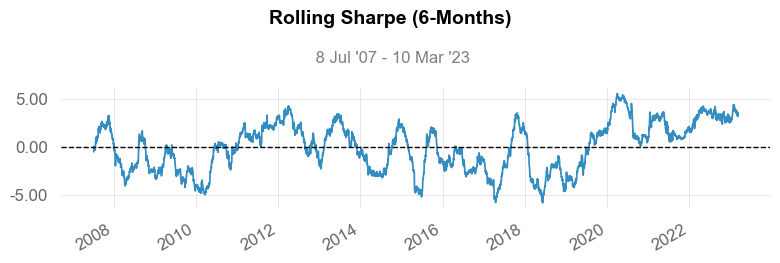

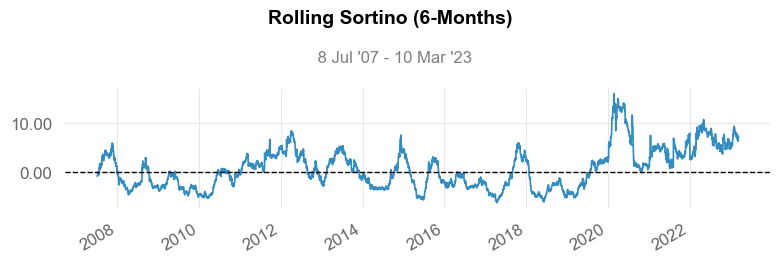

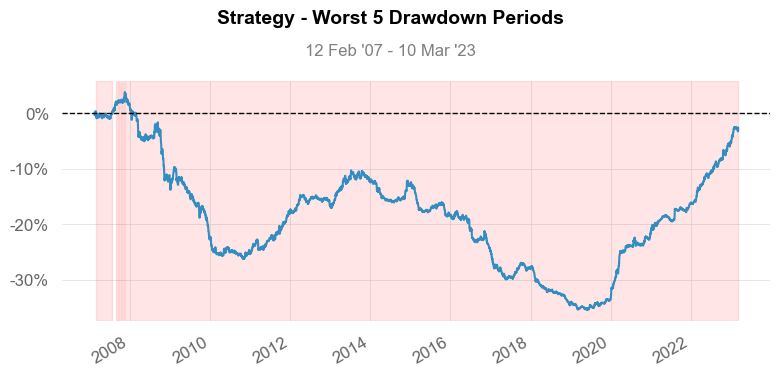

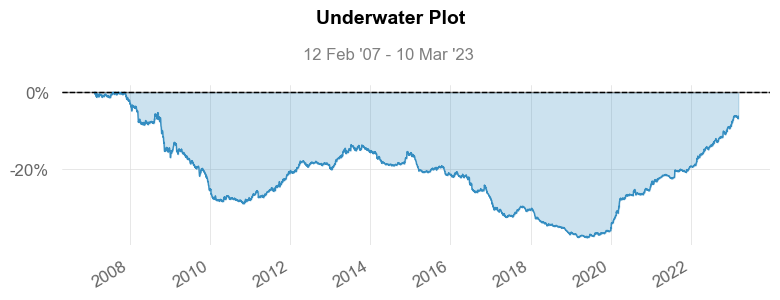

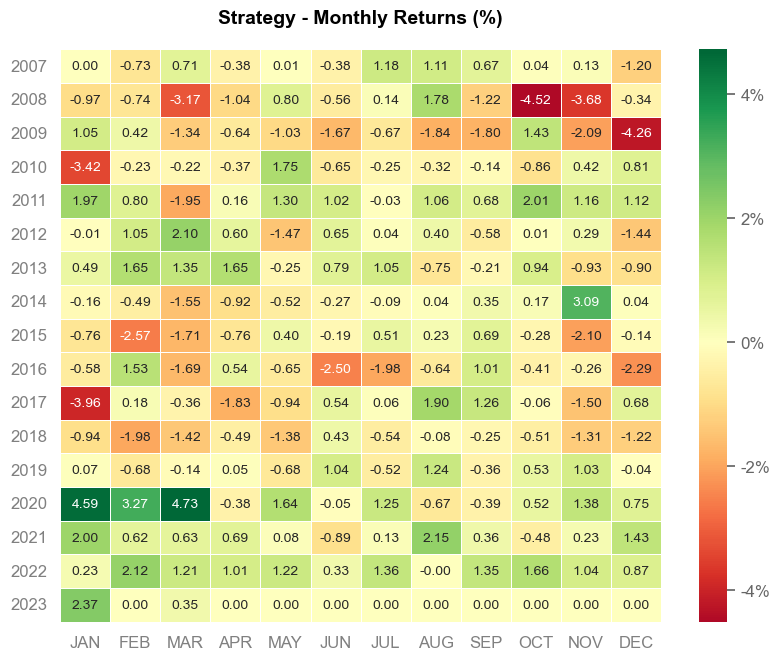

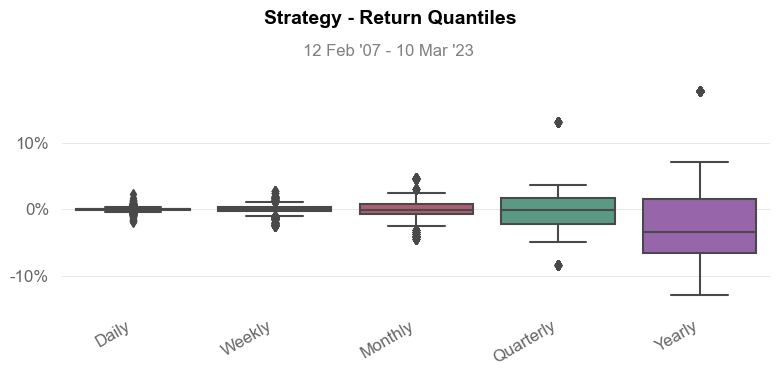

In [39]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H30

In [42]:
TF = 'M30'

In [43]:
data_1 = XAUUSD[TF]

In [44]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

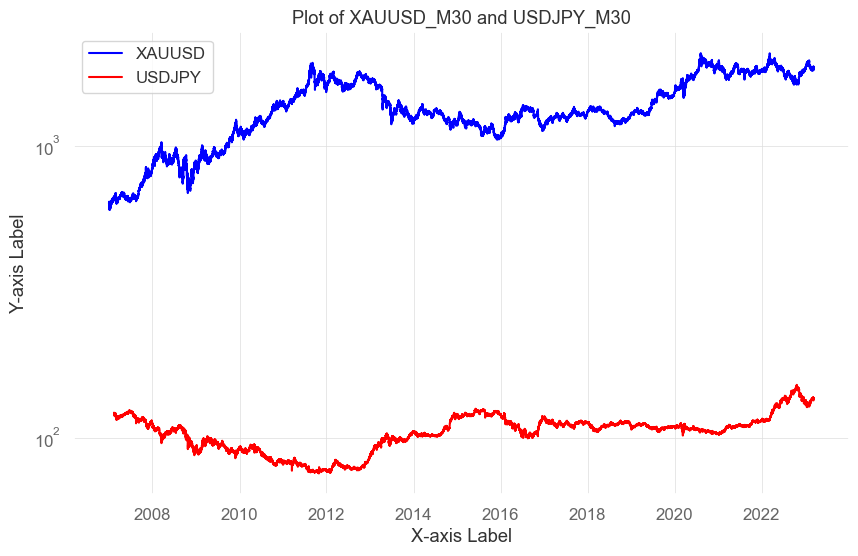

In [45]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [46]:
KF = Kalman_Filter(data_1, data_2)

In [47]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          2.380e+06
Date:                Mon, 12 Feb 2024   Prob (F-statistic):                        0.00
Time:                        00:11:17   Log-Likelihood:                     -1.4753e+06
No. Observations:              200000   AIC:                                  2.951e+06
Df Residuals:                  199999   BIC:                                  2.951e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         12.5932      0.008   1542.707      0.000      12.577      12.609
==============================================================================
Omnibus:                     2560.941   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1547.398
Skew:                          -0.018   Prob(JB):                         0.00
Kurtosis:                       2.571   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
result = KF.Run()

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-02-12
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          22.32%
CAGR﹪                     0.87%

Sharpe                     0.47
Prob. Sharpe Ratio         98.17%
Smart Sharpe               0.46
Sortino                    0.68
Smart Sortino              0.67
Sortino/√2                 0.48
Smart Sortino/√2           0.48
Omega                      1.09

Max Drawdown               -9.44%
Longest DD Days            1929
Volatility (ann.)          2.21%
Calmar                     0.09
Skew                       0.06
Kurtosis                   13.41

Expected Daily %           0.0%
Expected Monthly %         0.1%
Expected Yearly %          1.19%
Kelly Criterion            4.33%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.22%
Expected Shortfall (cVaR)  -0.22%

Max Consecutive Wins       14

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-12-30,2009-09-27,2013-02-24,1884,-9.443074,-8.688750
2,2014-11-17,2017-04-24,2020-02-27,1929,-4.932092,-4.686125
3,2013-10-25,2014-03-30,2014-11-11,383,-2.604668,-2.550782
4,2022-12-14,2023-03-09,2023-03-10,87,-2.069738,-2.002232
5,2007-02-14,2007-04-23,2007-07-24,161,-1.838681,-1.620485


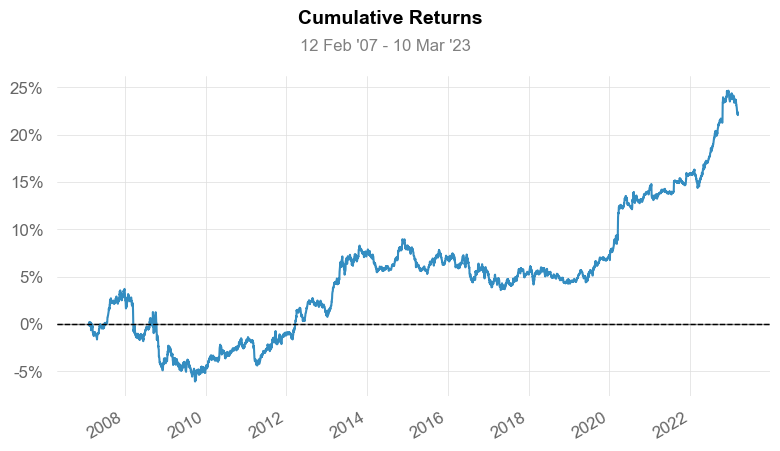

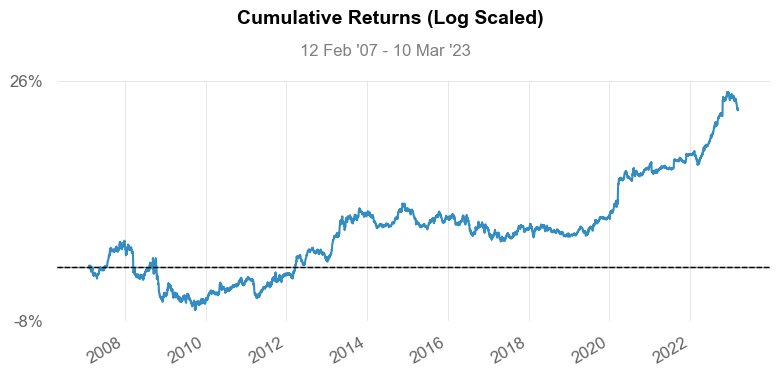

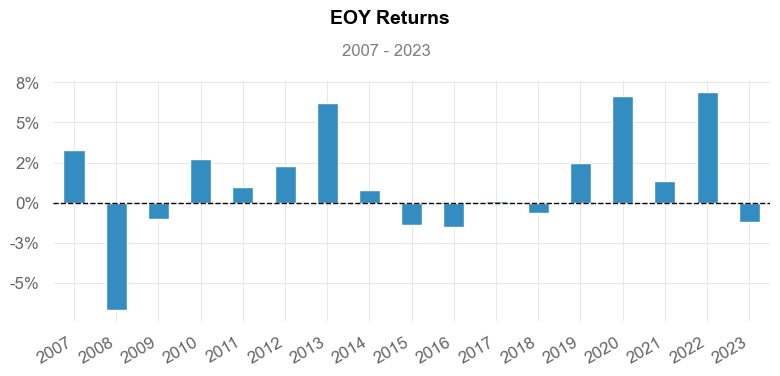

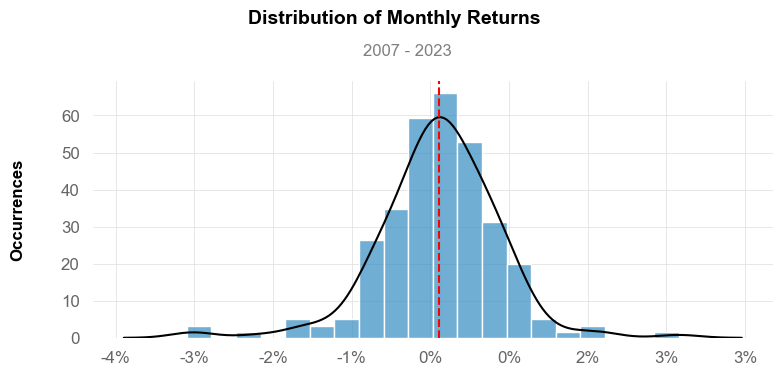

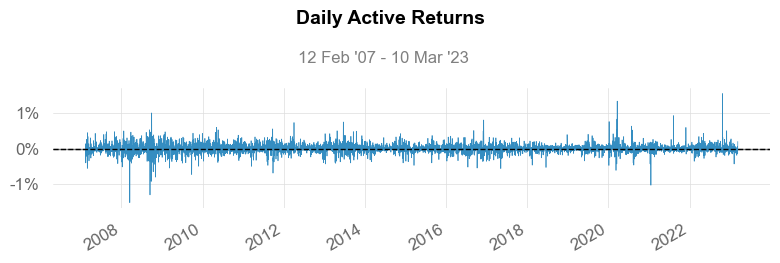

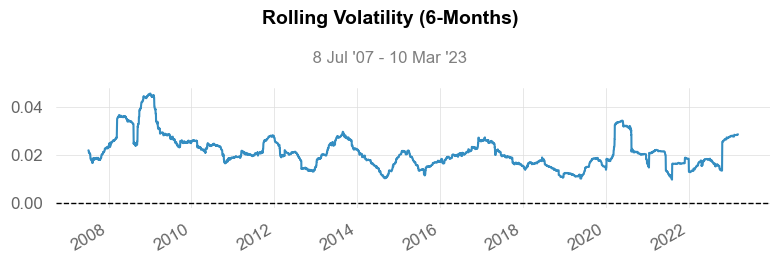

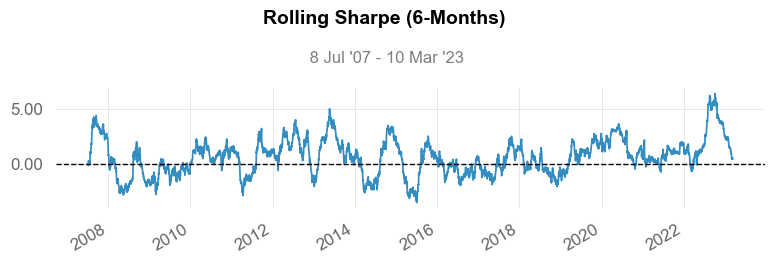

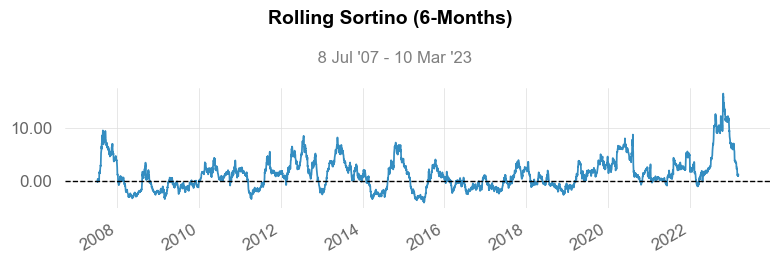

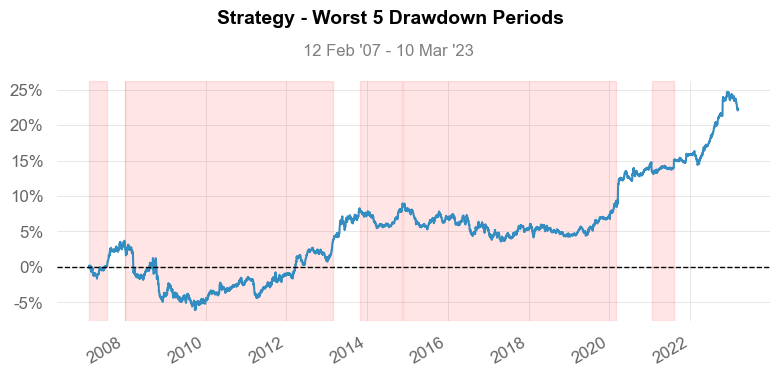

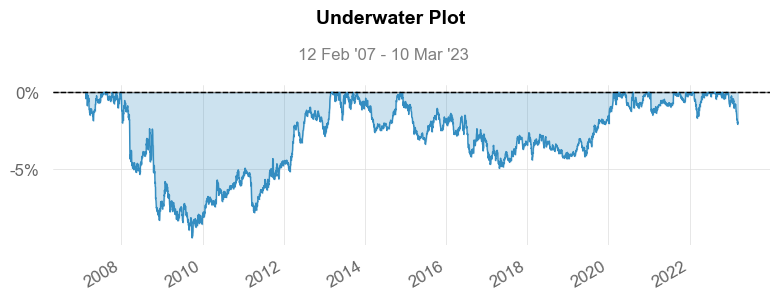

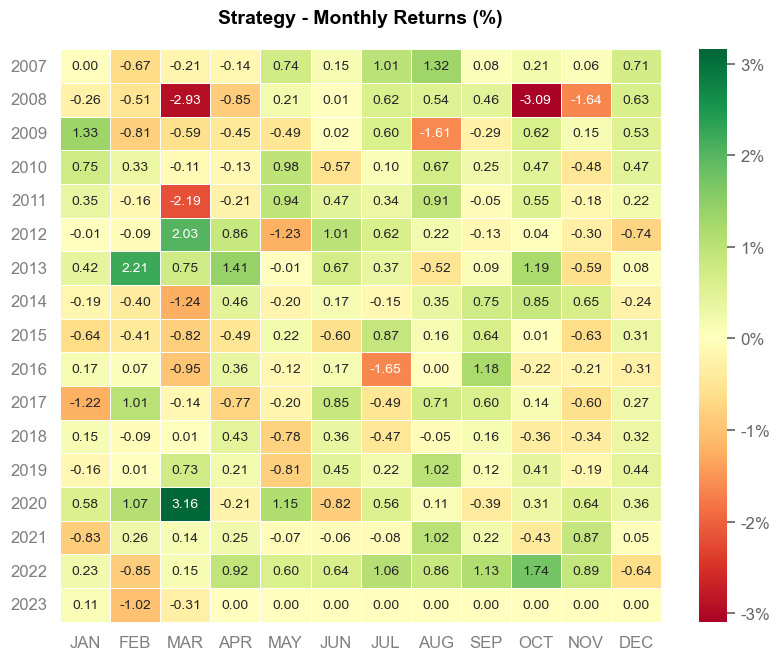

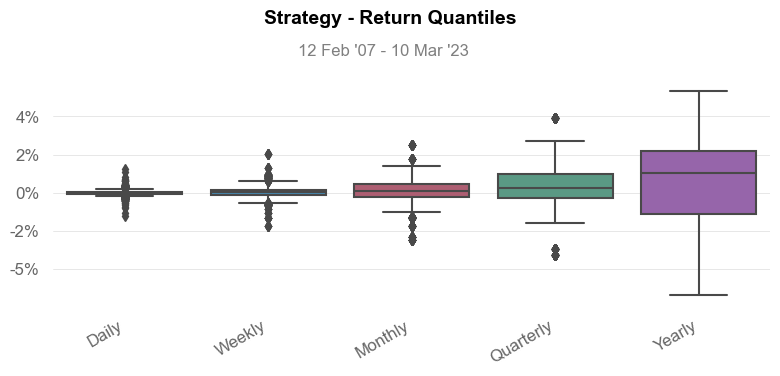

In [49]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())